In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as graph
import statsmodels.formula.api as smf
from scipy import stats 

dataset = pd.read_csv('chocolate data.txt', index_col=False, sep="\t",header=0)
print(dataset.head(10))

           
           

   weight  cocoa_percent  sugar_percent  milk_percent  customer_happiness
0     185             65             11            24                  47
1     247             44             34            22                  55
2     133             33             21            47                  35
3     145             30             38            32                  34
4     110             22             70             7                  40
5     134             25             38            37                  40
6     196             18             34            48                  41
7     118             45             38            17                  38
8     235             45             12            43                  50
9     107              8              2            90                  25


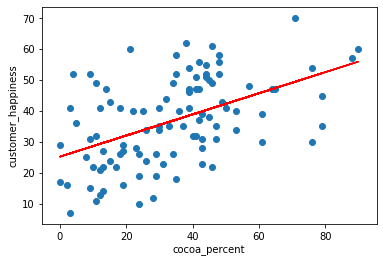

In [11]:
#want to know which chocolate bar features make customers happy 
#define a function to perform a linear regression 
#Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable
def PerformLinearRegression(formula):
    #This performs linear regression 
    lm = smf.ols(formula = formula, data = dataset).fit()
    
    featureName = formula.split(" ")[-1]
    
    #get the data for the x parameter (the feature)
    train_X = dataset[featureName]
    
    #This makes and shows a graph 
    intercept = lm.params[0]
    slope = lm.params[-1]
    line = slope * train_X + intercept
    graph.plot(train_X, line, '-', c = 'red')
    graph.scatter(train_X, dataset.customer_happiness)
    graph.ylabel('customer_happiness')
    graph.xlabel(featureName)
    graph.show()
    
#This performs the linear regreesion steps listed above 
#The text in red is the formula for the regression 
PerformLinearRegression('customer_happiness ~ cocoa_percent')
#each point represents an observation for a single chocolate bar.
#The below scatter plot, it seems that more cocoa makes customers more happy. We can tell, because as we increase the amount of cocoa (x axis) the amount of customer happiness (y axis) increases.

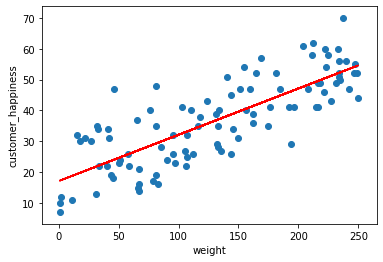

In [13]:
#try the variables sugar_percent and milk_percent to see if these improve customers' experiences.
PerformLinearRegression('customer_happiness ~ weight')


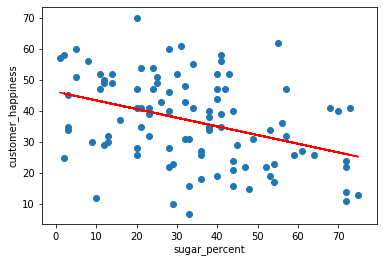

In [14]:
PerformLinearRegression('customer_happiness ~ sugar_percent')

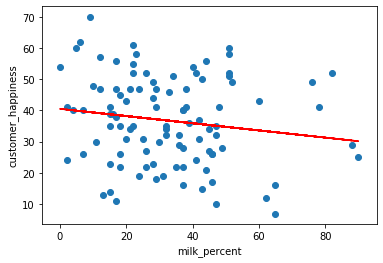

In [15]:
PerformLinearRegression('customer_happiness ~ milk_percent')

In [ ]:
#Conclusion: It looks like heavier chocolate bars make customers happier. The amount of milk or sugar, however, don't seem to make customers happier.